# Data Analysis + Visualizations

### Project Group # 2
> Group Members: Sadia Khan Durani, Safa Sajid, Mariam Virk

RECALL: Our project goal is to analyze the influence of Climate Change on Natural Disasters vs its Effects on Global Development.

Research Question: _How are countries affected by natural disasters, and can these disasters be linked to climate change?_

In [53]:
# Uncomment, run cell once, then comment again#
#!pip install oracledb

In [54]:
# Required Import Statements
import oracledb
import pandas as pd
import altair as alt
import numpy as np

**Connecting to the Oracle database**

In [55]:
# replace user with "ora_cwl"
# replace password with "a{student#}"

dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user = "ora_sadiakd", 
                              password = "a43762962", 
                              dsn = dsn)

## Exploratory Data Analysis. 
* To understand and explore our data, we will perform some EDA by running queries and making simple visualizations.

In [4]:
# Extract the number of disasters that have occured in Canada, United States and Mexico
# which have been included in our database and plot as a bar chart

num_of_disasters = """
SELECT Disaster_Country, Disaster_Subgroup, Disaster_Type, COUNT(Disaster_No)
FROM Natural_Disaster
GROUP BY Disaster_Country, Disaster_Subgroup, Disaster_Type
"""

cur = connection.cursor()
cur.execute(num_of_disasters)
rows = cur.fetchall()
cur.close()

disasters_by_country = pd.DataFrame(rows, columns=['Country', 'Disaster_Subgroup', 
                                                   'Disaster_Type','Number_of_Disasters'])
disasters_by_country.head(1)

,Country,Disaster_Subgroup,Disaster_Type,Number_of_Disasters
0,Mexico,Hydrological,Flood,41


In [5]:
# Bar Chart 1 colors by Disaster Subgroup

bar_chart1 = alt.Chart(disasters_by_country).mark_bar().encode(
    x = alt.X('Number_of_Disasters:Q', title = "# of Disasters", axis = alt.Axis(grid=False)),
    y = alt.Y('Country:N', title = "Country", axis = alt.Axis(domain = False)),
    color = alt.Color("Disaster_Subgroup", title = "Disaster Subgroup").scale(scheme = "set2")
).properties(
    title = 'Number of Natural Disasters by Country',
    width = 450,
    height = 200
).configure_view(
    strokeWidth = 0
)

bar_chart1

alt.Chart(...)

_This shows us that the most common groups of natural diasters in North America are meteorological disasters (which are correlated with physical changes in the earth's environment over time) and hydrological disasters, (which are caused by sudden and destructive changes in Earth's water/distribution of water in the oceans or atmosphere)._

_It is clear that the nature of these disasters is easily affected by climate change._

<br><br>

In [6]:
# Bar Chart 2 colors by Disaster Type

bar_chart2 = alt.Chart(disasters_by_country).mark_bar().encode(
    x = alt.X('Number_of_Disasters:Q', title = "# of Disasters", axis = alt.Axis(grid=False)),
    y = alt.Y('Country:N', title = "Country", axis = alt.Axis(domain = False)),
    color = alt.Color("Disaster_Type", title = "Disaster Type").scale(scheme = "set3")
).properties(
    title = 'Number of Natural Disasters by Country',
    width = 450,
    height = 200
).configure_view(
    strokeWidth = 0
)

bar_chart2

alt.Chart(...)

_Going deeper into the specific disasters, we see that the most common disaster types in North America are storms and floods, which are affected by factors such as climate change and rising sea levels._

_Therefore, we will proceed to see how climate change affects sea levels rising and the frequency of storms and floods in North America_

<br><br>

In [7]:
# Extract the information on Total Damages caused by different disaster types:

damges_by_disasters = """
SELECT nd.Disaster_Type, SUM(ed.Total_Damages)
FROM Natural_Disaster nd
JOIN Economic_Damages ed ON nd.Disaster_No = ed.Disaster_No
GROUP BY nd.Disaster_Type
"""

cur = connection.cursor()
cur.execute(damges_by_disasters)
rows = cur.fetchall()
cur.close()

damges_by_disasters_df = pd.DataFrame(rows, columns=['Disaster_Type', 'Total_Damages'])
damges_by_disasters_df.head(1)

,Disaster_Type,Total_Damages
0,Extreme temperature,4100000


In [8]:
# Plot the total damages caused by damages in North American Countries from 2000 to 2020

bar_chart_damage = alt.Chart(damges_by_disasters_df).mark_bar(color = "maroon").encode(
    x = alt.X('Total_Damages:Q', title = "Total Damges ($)", axis = alt.Axis(grid=False)),
    y = alt.Y('Disaster_Type:N', title = "Disaster Type", axis = alt.Axis(domain = False)).sort("x"),
    tooltip = ['Disaster_Type', 'Total_Damages']
).properties(
    title = 'Total Economic Damages by Disaster Type',
    width = 450,
    height = 200
).configure_view(
    strokeWidth = 0
)

bar_chart_damage

alt.Chart(...)

_Across the 3 North American Countries, in the past 20 years, we have lost over 400,000,000 in economic damages caused by natural disasters (in USD$)_

<br><br>

In [9]:
# Find out the total number of people affected from different disaster types
num_affected = """
SELECT nd.Disaster_Type, SUM(d.Total_Affected), SUM(Total_Deaths)
FROM Natural_Disaster nd
JOIN Damages d ON nd.Disaster_No = d.Disaster_No
GROUP BY nd.Disaster_Type
"""

cur = connection.cursor()
cur.execute(num_affected)
rows = cur.fetchall()
cur.close()


num_affected_df = pd.DataFrame(rows, columns=['Disaster_Type', 'Total_Affected', 'Total_Deaths'])
num_affected_df = num_affected_df.fillna(0)
num_affected_df.head(1)

,Disaster_Type,Total_Affected,Total_Deaths
0,Extreme temperature,120031,523.0


In [10]:
pie_chart1 = alt.Chart(num_affected_df).mark_arc().encode(
    theta = alt.Theta('Total_Affected:Q'),
    color = alt.Color('Disaster_Type', title = 'Disaster Type'),
    tooltip = alt.Tooltip("Total_Affected")
).properties(
    height = 150,
    width = 150,
    title = alt.Title("Total Affected", fontSize = 10)
) 

In [11]:
pie_chart2 = alt.Chart(num_affected_df).mark_arc().encode(
    theta = alt.Theta('Total_Deaths:Q'),
    color = alt.Color('Disaster_Type', title = 'Disaster Type'),
    tooltip = alt.Tooltip("Total_Deaths")
).properties(
    height = 150,
    width = 150,
    title = alt.Title("Total Deaths", fontSize = 10)
) 

In [12]:
alt.hconcat(
    pie_chart1, pie_chart2, spacing = 50
).configure_legend(
    orient='none',
    legendX = 430,
    legendY = 0
).properties(
    title = alt.Title("Comparison of Total Affected vs Total Deaths", 
                      fontSize = 15, anchor = "middle", offset = 20)
)

alt.HConcatChart(...)

_Given that the highest number of natural disasters are Storms, it makes sense that it also affects people the most. Additionally, the largest number of deaths are also caused from storms._

<br><br>

In [13]:
# Average Temperature Over Time By Country
temp_query = """
SELECT Country_Name, Year_Recorded, AVG(Max_Temperature)
FROM Climate_Metrics
GROUP BY Country_Name, Year_Recorded
"""

cur = connection.cursor()
cur.execute(temp_query)
rows = cur.fetchall()
cur.close()

temp_query_df = pd.DataFrame(rows, columns=['Country', 'Year', 'Temperature'])
temp_query_df.head(1)

,Country,Year,Temperature
0,Canada,2000,13.312956


In [52]:
# Area chart for Temperature
temp_chart = alt.Chart(temp_query_df).mark_line(color = 'orange').encode(
    x = alt.X('Year:O', axis = alt.Axis(grid = False, domain = False)),
    y = alt.Y('Temperature:Q', title = "Temperature (C)", axis = alt.Axis(grid = False, domain = False, offset = 10)),
    facet = alt.Facet("Country", title = None, spacing = 40)
).properties(
    title = alt.Title('Average Temperature Over Time', color = "Black", 
                      anchor = "middle", offset = 20, fontSize = 16),
    width = 300,
    height = 150
).configure_view(
    strokeWidth = 0
)

temp_chart

alt.Chart(...)

_From the above temperature vs year line plots for each country, we can tell that overall, temperatures have been increasing in all 3 countries._

<br><br>

<br><br><br>

# Visualizations/Analysis of Effects of C02 on Sea Levels Rising and Natural Disasters

**1) We will show how CO2 emissions across all the years change for the 3 North American  developed countries. This will be visualized as a line graph of CO2 over time, colored by country. We add a selection interval brush to analyze corresponding temperature at that year**

In [15]:
CO2_query = """
SELECT Country_Name, Year_Recorded, Avg_Temperature, Max_Temperature, Max_CO2_Emissions, Avg_CO2_Emissions
FROM Climate_Metrics
ORDER BY Year_Recorded
"""

cur = connection.cursor()
cur.execute(CO2_query)
rows = cur.fetchall()
cur.close()

CO2_df = pd.DataFrame(rows, columns = ['Country_Name', 'Year_Recorded', 'Avg_Temperature', 
                                       'Max_Temperature', 'Max_CO2_Emissions', 'Avg_CO2_Emissions'])
CO2_df.head(1)

,Country_Name,Year_Recorded,Avg_Temperature,Max_Temperature,Max_CO2_Emissions,Avg_CO2_Emissions
0,Mexico,2000,14.169422,14.169422,343.441091,343.441091


In [16]:
# Create the Selection Interval and Legend Label Selector parameters
brush = alt.selection_interval(encodings = ['x'])
legend_select = alt.selection_point(fields=['Country_Name'], bind='legend')

# Plot the data
line_chart1 = alt.Chart(CO2_df).mark_line(color = "black").encode(
    x = alt.X('Year_Recorded:O', title = "Year"),
    
    y = alt.Y('Max_CO2_Emissions:Q', title = "CO2 Emissions", 
              scale = alt.Scale(domain = [250, 550]), 
              axis = alt.Axis(grid = False, domain = False)),
    
    color = alt.Color('Country_Name', title = "Country"),
    opacity = alt.condition(legend_select, alt.value(1), alt.value(0.2)),
    tooltip = ['Year_Recorded', 'Max_CO2_Emissions']
).add_params(
    brush,
    legend_select
).properties(
    width = 350,
    height = 200
)

CO2_and_temp = alt.hconcat(line_chart1, line_chart1.encode(
    y = alt.Y("Max_Temperature", title = "Temperature", axis = alt.Axis(grid = False, domain = False))).transform_filter(legend_select).transform_filter(brush))

CO2_and_temp.properties(
    title = alt.Title("CO2 Emissions Over the Years vs Temperature", anchor = "middle", fontSize = 16)
).configure_view(
    strokeWidth = 0
)

alt.HConcatChart(...)

_In the interactive visualization above, you can select a country from the legend to view it independently, and also an interval across the x axis on the first plot..._

_When comparing side by side, we can see that when there is a rise in c02 emissions, the temperature also starts to rise about 2-3 years after. This implies that there is a relationship between C02 emissions and average temperature - as C02 emissions increase, the average temperature also increases, and this begins to intensify storms, raise sea levels, and more._

<br><br>

In [17]:
line = alt.Chart(CO2_df).mark_line(color = "black", size = 3).encode(
    x = alt.X("Year_Recorded:O"),
    y = alt.Y("sum(Avg_CO2_Emissions)")
)

In [18]:
# General trend of CO2 emissions across all the years

line_chart = alt.Chart(CO2_df).mark_line().encode(
    x = alt.X("Year_Recorded:O", title = "Year"),
    y = alt.Y("Avg_CO2_Emissions", title = "CO2 Accumulated" , axis = alt.Axis(grid = False)),
    color = alt.Color("Country_Name", title = "Country")
).properties(
    title = "Total CO2 Accumulation in North America"
)

subtext = alt.Chart(CO2_df).mark_text(
    #align = 'left',
    baseline = 'bottom',
    dx = 5,
    dy = -160
).encode(
    text = alt.value("The black line represents the entire trend of CO2 emissions across all the years")
)

alt.layer(line_chart, line, subtext).configure_view(
    strokeWidth = 0
)

alt.LayerChart(...)

_We see here that the production of C02 in each country has not decreased significantly, and when averaging out the trend, we see that the total C02 emissions over the past 20 years has been accumulating at a constant rate. This confirms that the amount of C02 being produced has been increasing, and we can further explore how this affects our climate._

<br><br>

**2) Explore how Sea level Rise is correlated with temperature increasing**

In [69]:
# Query to extract average Sea Level Rise
sea_level_query = """
SELECT Year_Recorded, AVG(Sea_Level_Rise), AVG(Max_Temperature)
FROM Climate_Metrics 
GROUP BY Year_Recorded
"""

cur = connection.cursor()
cur.execute(sea_level_query)
rows = cur.fetchall()
cur.close()

sea_level_df = pd.DataFrame(rows, columns=['Year', 'Avg_Sea_Level_Rise', 'Avg_Temperature'])
sea_level_df.head(1)

,Year,Avg_Sea_Level_Rise,Avg_Temperature
0,2009,-0.116277,19.692007


In [70]:
# Multiply the sea level rise by a scaling factor to make it comparable on the same plot to the average temperature visually
scaling_factor = 10
sea_level_df['Scaled_Sea_Level_Rise'] = sea_level_df['Avg_Sea_Level_Rise'] * scaling_factor

# Chart for Average Sea Level Rise
sea_level_chart = alt.Chart(sea_level_df).mark_area(color = 'mediumblue', opacity = 0.5).encode(
    x = alt.X('Year:O', title = 'Year'),
    y = alt.Y('Scaled_Sea_Level_Rise', axis = alt.Axis(title = 'Scaled Sea Level Rise', titleColor = 'mediumblue', grid = False)).scale(domain = [-4, 22]),
    tooltip = ['Year', 'Avg_Sea_Level_Rise', 'Avg_Temperature']
)

# Chart for Average Temperature
temperature_chart = alt.Chart(sea_level_df).mark_line(color = 'red').encode(
    x = alt.X('Year:O', title = 'Year'),
    y = alt.Y('Avg_Temperature', axis = alt.Axis(title = 'Average Temperature', titleColor = 'red', grid = False)).scale(domain = [-4, 22])
)

# Combine the charts
alt.layer(sea_level_chart, temperature_chart).resolve_scale(
    y = 'independent'
).properties(
    title = alt.Title('Average Sea Level Rise and Average Temperature Over Time', fontSize = 15)
).configure_view(
    strokeWidth = 0
)

alt.LayerChart(...)

_From the layered temperature red line over the sea level rise, we see that in general, when temperature rises, it is followed by sea level rising 1-2 years after. Similarly, when temperature falls, it is followed by sea level falling 1-2 years after. Additionally, note that the general trend of sea level rising is increasing, which makes sense given that we established the C02 in the atmosphere is also increasing over time._

<br><br>

# REGRESSION MODEL
- From our findings above, we fit a regression model with Sea Level Rise as the response variable.

In [38]:
# import statements needed for Regression

import statsmodels.api as sm

query_regression = """
SELECT cm.Max_Temperature, cm.Max_CO2_Emissions, cm.Avg_Temperature, cm.Avg_CO2_Emissions, cm.Sea_Level_Rise, cm.Humidity, d.Total_Affected, d.Total_Deaths, sei.GDP_Per_Capita, e.Total_Damages
FROM Climate_Metrics cm
JOIN Natural_Disaster nd ON cm.Country_Name = nd.Disaster_Country
JOIN Damages d ON nd.Disaster_No = d.Disaster_No
JOIN Socio_Economic_Indicators sei ON cm.Country_Name = sei.Socio_Country
JOIN Economic_Damages e ON d.Disaster_No = e.Disaster_No
WHERE d.Total_Affected IS NOT NULL AND d.Total_Deaths IS NOT NULL AND sei.GDP_Per_Capita IS NOT NULL AND e.Total_Damages IS NOT NULL
"""

cur = connection.cursor()
cur.execute(query_regression)
rows_regression = cur.fetchall()
cur.close()


regression_data = pd.DataFrame(rows_regression, columns = ['Max_Temperature', 'Max_CO2_Emissions', 'Avg_Temperature', 'Avg_CO2_Emissions', 'Sea_Level_Rise', 
                                                           'Humidity', 'Total_Affected', 'Total_Deaths', 'GDP_Per_Capita', 'Total_Damages'])
regression_data.head(1)

,Max_Temperature,Max_CO2_Emissions,Avg_Temperature,Avg_CO2_Emissions,Sea_Level_Rise,Humidity,Total_Affected,Total_Deaths,GDP_Per_Capita,Total_Damages
0,13.312956,440.546108,8.704837,430.252678,-0.159359,73.853461,840.0,11.0,36942.562,13000.0


In [39]:
# FUNCTION - adapted from Reference #1
def forward_selection(data, target, candidate_vars):
    initial_vars = []
    best_vars = []
    
    while len(candidate_vars) > 0:
        remaining_vars = list(set(candidate_vars) - set(best_vars))
        new_pval = pd.Series(index=remaining_vars)
        for new_column in remaining_vars:
            model = sm.OLS(target, sm.add_constant(data[best_vars+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < 0.1: 
            best_vars.append(new_pval.idxmin())
        else:
            break

    model = sm.OLS(target, sm.add_constant(data[best_vars])).fit()
    return model

In [41]:
y = regression_data['Sea_Level_Rise']

# Independent Variables
candidates = ['Max_Temperature', 'Max_CO2_Emissions', 'Avg_Temperature', 'Avg_CO2_Emissions',
               'Humidity', 'Total_Deaths', 'Total_Affected', 'Total_Damages', 'GDP_Per_Capita']


# Run forward selection on dependent variable sea level, candidates max c02,max temp, avg temp, avg c02
model1 = forward_selection(regression_data, y, candidates)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         Sea_Level_Rise   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2969.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:34:34   Log-Likelihood:                -39676.
No. Observations:               35340   AIC:                         7.937e+04
Df Residuals:                   35333   BIC:                         7.943e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7031      0.05

<br><br>

**RESIDUAL PLOTS:**


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


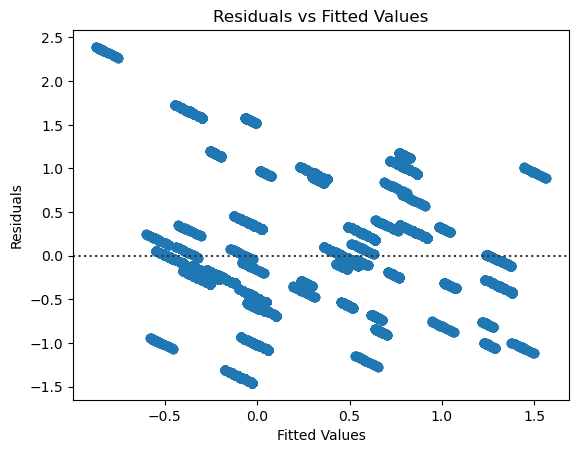

In [45]:
residuals = model1.resid
fitted_values = model1.fittedvalues

# Plot residuals vs fitted values
sns.residplot(x = fitted_values, y = residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


<br>


#### Connections between disasters, damages, and country GDP 

<br>

In [46]:
# Line charts of counts of disaster per year with all disasters in the plot

disaster_counts_query = """
SELECT Disaster_Year, COUNT(Disaster_No), ND.Disaster_Type, AVG(CM.Sea_Level_Rise)
FROM Natural_Disaster ND
JOIN Climate_Metrics CM ON ND.Disaster_Year = CM.Year_Recorded
GROUP BY ND.Disaster_Year, ND.Disaster_Type, CM.Sea_Level_Rise
"""

cur = connection.cursor()
cur.execute(disaster_counts_query)
rows = cur.fetchall()
cur.close()

disaster_counts_df = pd.DataFrame(rows, columns=['Disaster_Year', 'count', 'Disaster_Type', 'Sea_Level_Rise'])
disaster_counts_df.head(1)

,Disaster_Year,count,Disaster_Type,Sea_Level_Rise
0,2000,11,Flood,-0.484336


In [47]:
# Line Charts
disasters = alt.Chart(disaster_counts_df).mark_line().encode(
    x = alt.X("Disaster_Year:O", title = "Year"),
    y = alt.Y("count", title = "Count"),
    color = alt.Color("Disaster_Type", title = "Type Of Disaster")
).properties(
    width = 500,
    title = "Frequencies of Different Disasters over the Years vs Sea Level Rise"
)

sea_line = alt.Chart(disaster_counts_df).mark_line(color = "black", size = 3).encode(
    x = alt.X("Disaster_Year:O", title = "Year"),
    y = alt.Y("Sea_Level_Rise", title = "Sea Level")
)

disasters + sea_line

alt.LayerChart(...)

_Sea level rise appears to be correlated with the rise and falls of floods and storms, implying that the factors causing sea level rise (C02 emissions) are affecting the frequency and intensity of disasters such as floods and storms._


<br><br>

In [48]:
# Line plot of total damages and GDP per capita over the years

damages_and_gdp = """
SELECT SEI.Socio_Year, SEI.Socio_Country, SUM(ED.Total_Damages), SEI.GDP_Per_Capita
FROM Socio_Economic_Indicators SEI
JOIN Damages D ON SEI.Socio_Country = D.Disaster_Country AND SEI.Socio_Year = D.Disaster_Year
JOIN Economic_Damages ED ON D.Disaster_No = ED.Disaster_No
GROUP BY SEI.Socio_Year, SEI.Socio_Country, SEI.GDP_Per_Capita
ORDER BY SEI.Socio_Year ASC
"""

cur = connection.cursor()
cur.execute(damages_and_gdp)
rows = cur.fetchall()
cur.close()

damages_and_gdp = pd.DataFrame(rows, columns=['Socio_Year', 'Socio_Country', 'Total_Damages', 'GDP_Per_Capita'])
# bottom one has missing values
damages_and_gdp.head(1)

,Socio_Year,Socio_Country,Total_Damages,GDP_Per_Capita
0,2000,Canada,13000,36942.562


In [49]:
scaling_factor = 1000 # adjust this as needed to get a meaningful visual comparison
damages_and_gdp['Scaled_GDP_Per_Capita'] = damages_and_gdp['GDP_Per_Capita'] * scaling_factor

# Create the chart for Total Damages
damages_chart = alt.Chart(damages_and_gdp).mark_line(color = 'red').encode(
    x=alt.X('Socio_Year:O', title='Year'),
    y=alt.Y('Total_Damages', axis = alt.Axis(title = 'Total Damages ($)', titleColor = "red", grid = False)).scale(domain = [0, 150000000]),
    tooltip=['Socio_Year', 'Total_Damages', 'GDP_Per_Capita']
).properties(
    width = 800,
    height = 400
)

# Create the chart for Scaled GDP Per Capita
gdp_chart = alt.Chart(damages_and_gdp).mark_line(color = 'blue').encode(
    x = alt.X('Socio_Year:O', title = "Year"),
    y = alt.Y('Scaled_GDP_Per_Capita', axis = alt.Axis(title = 'Scaled GDP/capita', titleColor = "blue", grid = False)).scale(domain = [0, 150000000])
)

# Combine the charts with dual y-axes
alt.layer(damages_chart, gdp_chart).resolve_scale(
    y = 'independent'
).properties(
    title = 'Total Damages and Scaled GDP Per Capita Over Time'
).configure_view(
    strokeWidth = 0
)

alt.LayerChart(...)

_We can see there is an upward trend in both GDP and Total Damages, which is concerning. This indicates that over the past 20 years, the cost of damages is still impacting the economy of a country, and this may be okay for North American countries with our increasing GDP, but it is obvious that the same safety net doesn't exist for developing countries._

<br><br>

_This regression model shows that sea levels rising, avg temperature (caused from c02 emissions), the country's gdp, and the total damages from disasters is significantly correlated with the total deaths from natural disasters. This shows that the damages and effects from climate change are negatively impacting a country's economy and population, highlighting the signifcance of climate change._

In [50]:
X = regression_data[['Sea_Level_Rise','Avg_Temperature', 'GDP_Per_Capita','Total_Damages']]
y = regression_data['Total_Deaths']

# Add a constant term to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model2 = sm.OLS(y, X).fit()

# Print the regression summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Deaths   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 6.008e+04
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:35:38   Log-Likelihood:            -1.9595e+05
No. Observations:               35340   AIC:                         3.919e+05
Df Residuals:                   35335   BIC:                         3.919e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              32.8497      1.479     

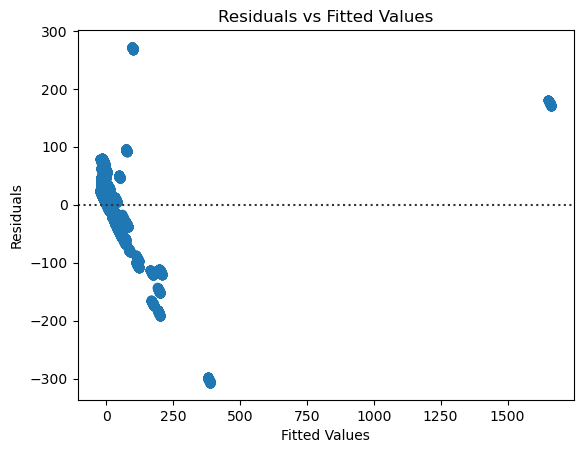

In [51]:
residuals = model2.resid
fitted_values = model2.fittedvalues

# Plot residuals vs fitted values
sns.residplot(x = fitted_values, y = residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### **In Conclusion:**
> We have shown that over the past 20 years, North American countries have been steadily producing C02 emissions, and the accumulation of this has been shown to correlate with increasing temperatures as shown in our line graphs. We further explored how both of these factors affect the seas and oceans surrounding North America, and how they're correlated with an increase in the frequency of North America's most common natural disasters - Storms and Floods. Finally, we saw that the economy of North American countries has allowed them to survive the expenses and damages cost from natural disasters - but this won't be the same for developing countries, which is why climate change is a serious concern and rapid measures must be taken to slow it down.  

<br>

## References:

1. https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-a-forward-selection-stepwise-regression-algorithm